## Data Cleaning

In [57]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [81]:
# Load in training and test datasets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

### Identifying Missing Values

In [82]:
# missing values in training dataset
missing_values_train = train.isna().sum()
print("Missing values in training dataset:")
print(missing_values_train[missing_values_train > 0])

Missing values in training dataset:
Lot Frontage       253
Alley             1427
Mas Vnr Type       931
Mas Vnr Area        18
Bsmt Qual           40
Bsmt Cond           40
Bsmt Exposure       43
BsmtFin Type 1      40
BsmtFin SF 1         1
BsmtFin Type 2      41
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu       765
Garage Type         88
Garage Yr Blt       88
Garage Finish       88
Garage Qual         88
Garage Cond         88
Pool QC           1531
Fence             1225
Misc Feature      1484
dtype: int64


### What Percentage of each feature contained null values? 

In [60]:
# Create mask to find variables with null values
null_values = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False)

# Create dictionary of null values
null_dict = {f'{col}': train[col].isnull().sum() for col in null_values.index}

# Find exact percentages of null values
print('NaN Values', end='\n--------------\n')
for key, value in null_dict.items():
    x = value / len(train)
    print(f'{key}: {value}/{len(train)} - {x*100:.2f}%')

NaN Values
--------------
Pool QC: 1531/1538 - 99.54%
Misc Feature: 1484/1538 - 96.49%
Alley: 1427/1538 - 92.78%
Fence: 1225/1538 - 79.65%
Mas Vnr Type: 931/1538 - 60.53%
Fireplace Qu: 765/1538 - 49.74%
Lot Frontage: 253/1538 - 16.45%
Garage Type: 88/1538 - 5.72%
Garage Cond: 88/1538 - 5.72%
Garage Qual: 88/1538 - 5.72%
Garage Finish: 88/1538 - 5.72%
Garage Yr Blt: 88/1538 - 5.72%
Bsmt Exposure: 43/1538 - 2.80%
BsmtFin Type 2: 41/1538 - 2.67%
BsmtFin Type 1: 40/1538 - 2.60%
Bsmt Qual: 40/1538 - 2.60%
Bsmt Cond: 40/1538 - 2.60%
Mas Vnr Area: 18/1538 - 1.17%
Bsmt Half Bath: 2/1538 - 0.13%
Bsmt Full Bath: 2/1538 - 0.13%
BsmtFin SF 1: 1/1538 - 0.07%
Bsmt Unf SF: 1/1538 - 0.07%
BsmtFin SF 2: 1/1538 - 0.07%
Total Bsmt SF: 1/1538 - 0.07%


### Deciding How to Handle Missing Values

WHAT I WANT TO DROP: 
* Columns with a high percentage of missing values (about 50% or greater): Pool QC, Misc Feature, Alley, Fence, Mas Vnr Type, Fireplace Qu;
* Why? Because imputing such a large proportion of missing values would not provide meaningful information.
* I also want to drop features that have no relevance to sale price: Id and PID
* Lastly, I am going to drop most categorical features for now.

WHAT I WANT TO IMPUTE:
* Features with a low percentage of missing values (< 20%)

In [61]:
# List of features to drop
features_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 'Fireplace Qu', 'Id', 'PID', 'Utilities', 
                    'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
                    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
                    'Kitchen Qual', 'Functional', 'Garage Qual', 'Garage Cond',  'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Heating',
                    'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 
                    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                    'Exterior 2nd', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish', 
                    'Paved Drive', 'Sale Type', 'Mo Sold', 'Yr Sold', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Pool Area', 'Misc Val', '3Ssn Porch',
                   'Enclosed Porch', 'Kitchen AbvGr','Bsmt Half Bath','Bsmt Full Bath', 'Low Qual Fin SF', 'MS SubClass', 'Lot Frontage', 'Lot Area',
                   'Screen Porch', 'Garage Yr Blt', 'Total Bsmt SF']

# Dropping the features from the dataset
train = train.drop(columns=features_to_drop, axis=1)

train.head()

,Unnamed: 0,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,532,6,6,1971,1971,302.0,1587,0,1587,2,0,3,7,1,2.0,525.0,0,44,167300
1,415,7,8,1937,1980,0.0,1262,1005,2267,1,1,3,7,2,2.0,498.0,521,0,219000
2,273,5,8,1950,2002,0.0,864,0,864,1,0,3,5,0,2.0,720.0,194,0,129000
3,1460,7,5,1996,1997,0.0,1306,954,2260,2,1,3,7,0,2.0,533.0,296,44,328000
4,250,8,7,1995,1995,466.0,1251,1250,2501,2,1,4,9,1,3.0,751.0,192,87,290000


### These are the columns I am left with:

In [62]:
train.columns

Index(['Unnamed: 0', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'SalePrice'],
      dtype='object')

### Now lets move on to imputing missing data using the mean!

In [84]:
from sklearn.impute import SimpleImputer

# List of numeric features to impute (# I removed: 'BsmtFin SF 1', 'Bsmt Unf SF', 'BsmtFin SF 2', 'Bsmt Half Bath', 'Bsmt Full Bath', 'Lot Frontage', 'Garage Yr Blt')
numeric_features_to_impute = ['Mas Vnr Area', 'Garage Cars', 'Garage Area']

# Impute numeric features
numeric_imputer = SimpleImputer(strategy='mean')
train[numeric_features_to_impute] = numeric_imputer.fit_transform(train[numeric_features_to_impute])

test[numeric_features_to_impute] = numeric_imputer.transform(test[numeric_features_to_impute])

### Conducting Correlation Analysis

In [88]:
numeric_train = train.select_dtypes(include=[np.number])  # Select only numeric columns

# Compute correlation matrix
correlation_matrix = numeric_train.corr()

# Display
print("Correlation coefficients:")
print(correlation_matrix)

Correlation coefficients:
                 Unnamed: 0        Id       PID  MS SubClass  Lot Frontage  \
Unnamed: 0         1.000000  0.007221 -0.017721    -0.050034     -0.000821   
Id                 0.007221  1.000000  0.184318     0.020281     -0.024332   
PID               -0.017721  0.184318  1.000000     0.011182     -0.068578   
MS SubClass       -0.050034  0.020281  0.011182     1.000000     -0.379419   
Lot Frontage      -0.000821 -0.024332 -0.068578    -0.379419      1.000000   
Lot Area           0.015194  0.004998 -0.010495    -0.296340      0.595939   
Overall Qual      -0.002256 -0.056597 -0.273544     0.034091      0.178668   
Overall Cond      -0.018655 -0.022776  0.114102    -0.051818     -0.063668   
Year Built         0.062156 -0.079851 -0.353622     0.029963      0.094040   
Year Remod/Add     0.009227 -0.090618 -0.176675     0.073183      0.076600   
Mas Vnr Area      -0.017883 -0.042417 -0.250820    -0.013220      0.215311   
BsmtFin SF 1       0.019712 -0.058428 

### What does the above correlation matrix demonstrate?

#### It provides insights into the relationships between different features and revealed that there is definitely some multicollinearity going on. This means that some features show high correlations among themselves. For example, Garage Cars and Garage Area have a correlation coefficient of 0.89, suggesting they provide similar information. Similarly, Total Bsmt SF and 1st Flr SF have a correlation of 0.82. Year Built and Garage Yr Blt exhibit a moderate positive correlation (0.83), indicating that most garages are built around the same time as the house itself. Interestingly, some features, such as Month Sold and Year Sold, have relatively low correlations with Sale Price, indicating they might not directly influence house prices to a significant degree.


### How I Plan To Deal With Multicollinearity: Regularization

#### Multicollinearity can pose challenges in regression analysis, such as inflating standard errors of coefficients and making coefficient estimates sensitive to small changes in the model. I am going to address multicollinearity through regularization techniques like Ridge Regression or Lasso Regression. This will penalize the coefficients of highly correlated features, reducing their impact on the model. These techniques can help in reducing overfitting and improving the model's generalization performance.

### Dealing With Outliers 

#### Given that my goal is to predict house sale prices accurately, addressing outliers in the target feature (Sale Price) is most important as this can significantly affect the predictive performance of my model by skewing the predictions towards these extreme values. I will also address other features containing outliers, which are mostly features having to do with square footage and area. 

In [70]:
# column_names = ['Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
#                'Total Bsmt SF', '1st Flr SF', 'Lot Area', 'Mas Vnr Area', 'Lot Frontage']

train[train['Gr Liv Area']<=4000]
train = train[train['Gr Liv Area']<=4000]

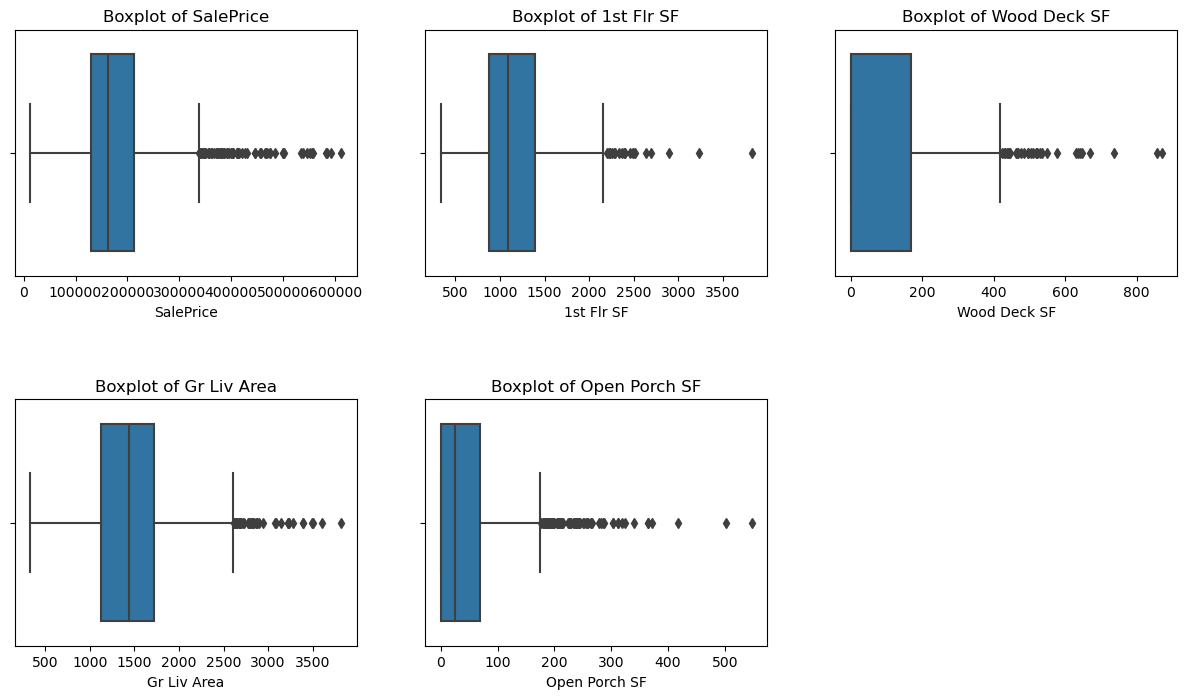

In [71]:
features_to_visualize = ['SalePrice', '1st Flr SF', 
                         'Wood Deck SF', 'Gr Liv Area', 
                         'Open Porch SF']

# Calculate the number of rows needed for the subplot grid
num_features = len(features_to_visualize)
num_cols = 3
num_rows = (num_features - 1) // num_cols + 1

# Create box plots for each feature
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=True)
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_to_visualize):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(x=train[feature], ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(f'Boxplot of {feature}')

# Remove any empty subplots if the number of features is not a multiple of 3
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.show()

### The boxplots results above are AFTER I dropped outliers. I removed square footage equal to or exceeding 4,000 sqft. This ended up helping my model quite a bit!

In [72]:
# Saving my cleaned data to a CSV file
train.to_csv('clean_train.csv', index=False)

In [89]:
# Applying everything I did to the test data

In [73]:
def preprocess_test(test, label_encoded_features, one_hot_encoded_features, encoded_columns):
    # List of features to drop
    features_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 
                        'Fireplace Qu', 'Id', 'PID', 'Utilites']
    test = test.drop(columns=features_to_drop, axis=1)
    print("Shape of test dataframe after dropping columns:", test.shape)
    
    # List of numeric features to impute
    numeric_features_to_impute = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 
                                  'Bsmt Half Bath', 'Bsmt Full Bath', 'BsmtFin SF 1', 
                                  'Bsmt Unf SF', 'BsmtFin SF 2', 'Total Bsmt SF']
    numeric_imputer = SimpleImputer(strategy='median')
    test[numeric_features_to_impute] = numeric_imputer.transform(test[numeric_features_to_impute])
    
    print("Number of missing values after imputing numeric features:")
    print(test[numeric_features_to_impute].isnull().sum())
    
    # List of categorical features to impute
    categorical_features_to_impute = ['Garage Type', 'Garage Cond', 'Garage Qual', 
                                      'Garage Finish', 'Bsmt Exposure', 'BsmtFin Type 2', 
                                      'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond']
    # Impute categorical features
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    test[categorical_features_to_impute] = categorical_imputer.transform(test[categorical_features_to_impute])

    print("Number of missing values after imputing categorical features:")
    print(test[categorical_features_to_impute].isnull().sum())

    # Apply label encoding to the specified features
    label_encoder = LabelEncoder()
    for feature in label_encoded_features:
        test[feature] = label_encoder.transform(test[feature])

    # Apply one-hot encoding to the specified features
    one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_data = one_hot_encoder.transform(test[one_hot_encoded_features])
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=test.index)

    # Concatenate the encoded features with the original data
    test = pd.concat([test.drop(one_hot_encoded_features, axis=1), encoded_df], axis=1)

    # Apply transformations to specified columns
    column_names = ['Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Total Bsmt SF', '1st Flr SF', 
                    'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Lot Area', 'Mas Vnr Area', 'Lot Frontage']
    for column_name in column_names:
        median = test[column_name].median()
        q1 = test[column_name].quantile(0.25)
        q3 = test[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = test[(test[column_name] < lower_bound) | (test[column_name] > upper_bound)][column_name]
        transformed_outliers = np.log1p(outliers)
        test.loc[(test[column_name] < lower_bound) | (test[column_name] > upper_bound), column_name] = transformed_outliers.astype(int)
    
    return test

In [74]:
# Saving my cleaned testing data to a CSV file
test.to_csv('clean_test.csv', index=False)